In [2]:
import polars as pl
import polars.selectors as cs

import numpy as np
import pandas as pd # just in case

In [5]:
census_income: str = "C:/Users/eorlo/Downloads/census_income.csv"
df_census = pl.read_csv(census_income)
df_pokemon = pl.read_csv("https://gist.githubusercontent.com/ritchie46/cac6b337ea52281aa23c049250a4ff03/raw/89a957ff3919d90e6ef2d34235e6bf22304f3366/pokemon.csv")

# Use Lazy api

In [6]:
df_0 = (
	pl.scan_csv(census_income)
	.with_columns(pl.col('age').cast(pl.Int32))
	.filter(pl.col("age") > 25)
)
# Note not executed at this stage.

In [7]:
df_0

<LazyFrame [15 cols, {"age": Int32 … "income": String}] at 0x1C3DB9A2E10>

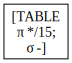

In [8]:
df_census.lazy().show_graph(optimized=True, show=True)

In [9]:
df_census.lazy().filter(pl.col("age") > 25)

<LazyFrame [15 cols, {"age": Int64 … "income": String}] at 0x1C3DD2A1AC0>

In [10]:
df_0.limit(3).collect()

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
i32,str,i64,str,i64,str,str,str,str,str,i64,i64,i64,str,str
90,"""?""",77053,"""HS-grad""",9,"""Widowed""","""?""","""Not-in-family""","""White""","""Female""",0,4356,40,"""United-States""","""<=50K"""
82,"""Private""",132870,"""HS-grad""",9,"""Widowed""","""Exec-manageria…","""Not-in-family""","""White""","""Female""",0,4356,18,"""United-States""","""<=50K"""
66,"""?""",186061,"""Some-college""",10,"""Widowed""","""?""","""Unmarried""","""Black""","""Female""",0,4356,40,"""United-States""","""<=50K"""


Data Creation


In [12]:
from datetime import datetime

df = pl.DataFrame(
	{
		"integer": [1, 2, 3],
		"date": [
			datetime(2025, 1, 1),
			datetime(2025, 1, 2),
			datetime(2025, 1, 3),
    	],
  	    "float": [4.0, 5.0, 6.0],
		"string": ["a", "b", "c"],
	}
)

df.to_dummies("string")

integer,date,float,string_a,string_b,string_c
i64,datetime[μs],f64,u8,u8,u8
1,2025-01-01 00:00:00,4.0,1,0,0
2,2025-01-02 00:00:00,5.0,0,1,0
3,2025-01-03 00:00:00,6.0,0,0,1


Data Inspection


In [13]:
df_census.shape

(32561, 15)

In [14]:
df_census.dtypes

[Int64,
 String,
 Int64,
 String,
 Int64,
 String,
 String,
 String,
 String,
 String,
 Int64,
 Int64,
 Int64,
 String,
 String]

Typically pandas `describe` is used to get a quick overview of the data. Polars has a describe also which is very similar to Pandas, but honestly doesnt look as great as it by default mixes dtypes, with no way within the function to choose which columns. However, you can use `selectors` to get around that issue, but it still displays non-applicable stats for strings.


In [15]:
df_census.describe()

statistic,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
str,f64,str,f64,str,f64,str,str,str,str,str,f64,f64,f64,str,str
"""count""",32561.0,"""32561""",32561.0,"""32561""",32561.0,"""32561""","""32561""","""32561""","""32561""","""32561""",32561.0,32561.0,32561.0,"""32561""","""32561"""
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""0""","""0"""
"""mean""",38.581647,null,189778.366512,null,10.080679,null,null,null,null,null,1077.648844,87.30383,40.437456,null,null
"""std""",13.640433,null,105549.977697,null,2.57272,null,null,null,null,null,7385.292085,402.960219,12.347429,null,null
"""min""",17.0,"""?""",12285.0,"""10th""",1.0,"""Divorced""","""?""","""Husband""","""Amer-Indian-Es…","""Female""",0.0,0.0,1.0,"""?""","""<=50K"""
"""25%""",28.0,null,117827.0,null,9.0,null,null,null,null,null,0.0,0.0,40.0,null,null
"""50%""",37.0,null,178356.0,null,10.0,null,null,null,null,null,0.0,0.0,40.0,null,null
"""75%""",48.0,null,237051.0,null,12.0,null,null,null,null,null,0.0,0.0,45.0,null,null
"""max""",90.0,"""Without-pay""",1.484705e6,"""Some-college""",16.0,"""Widowed""","""Transport-movi…","""Wife""","""White""","""Male""",99999.0,4356.0,99.0,"""Yugoslavia""",""">50K"""


Even when using pandas `describe`, it is almost always better displayed as transposed with even just a few columns, since more info can be displayed without being hidden. The structure of the Polars `describe` doesnt lend itself to using `transpose`.


In [16]:
df_census.select(cs.numeric()).describe().transpose(include_header=True, column_names='statistic')

column,count,null_count,mean,std,min,25%,50%,75%,max
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""age""",32561.0,0.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
"""fnlwgt""",32561.0,0.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1.484705e6
"""education.num""",32561.0,0.0,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
"""capital.gain""",32561.0,0.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
"""capital.loss""",32561.0,0.0,87.30383,402.960219,0.0,0.0,0.0,0.0,4356.0
"""hours.per.week…",32561.0,0.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
# still buggy
# df_census.describe().pivot(columns='statistic', values='value', index=None)

# The dtype should be an arg to describe.

In [18]:
df_census.null_count()

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_census.select(pl.all().n_unique())

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
73,9,21648,16,16,7,15,6,5,2,119,92,94,42,2


In [20]:
df_census.count()

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561


## Selection & Filtering

### Selection

[links](https://docs.pola.rs/user-guide/expressions/column-selections/)


In [21]:
df_census.select("age", "education").head()

age,education
i64,str
90,"""HS-grad"""
82,"""HS-grad"""
66,"""Some-college"""
54,"""7th-8th"""
41,"""Some-college"""


In [22]:
df_census[['age', 'education']].head()  # old bracket notation, but its better to use select as above.

age,education
i64,str
90,"""HS-grad"""
82,"""HS-grad"""
66,"""Some-college"""
54,"""7th-8th"""
41,"""Some-college"""


In [23]:
df_census.select(cs.string()).dtypes

[String, String, String, String, String, String, String, String, String]

In [24]:
df_census.select(cs.starts_with("capital"), cs.matches("educ|inc"))

capital.gain,capital.loss,education,education.num,income
i64,i64,str,i64,str
0,4356,"""HS-grad""",9,"""<=50K"""
0,4356,"""HS-grad""",9,"""<=50K"""
0,4356,"""Some-college""",10,"""<=50K"""
0,3900,"""7th-8th""",4,"""<=50K"""
0,3900,"""Some-college""",10,"""<=50K"""
…,…,…,…,…
0,0,"""Some-college""",10,"""<=50K"""
0,0,"""Assoc-acdm""",12,"""<=50K"""
0,0,"""HS-grad""",9,""">50K"""


In [25]:
df_census.select(cs.integer())  # compared with cs.float or cs.numeric

age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
i64,i64,i64,i64,i64,i64
90,77053,9,0,4356,40
82,132870,9,0,4356,18
66,186061,10,0,4356,40
54,140359,4,0,3900,40
41,264663,10,0,3900,40
…,…,…,…,…,…
22,310152,10,0,0,40
27,257302,12,0,0,38
40,154374,9,0,0,40


In [26]:
df_census.select(cs.exclude(cs.string()))

age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
i64,i64,i64,i64,i64,i64
90,77053,9,0,4356,40
82,132870,9,0,4356,18
66,186061,10,0,4356,40
54,140359,4,0,3900,40
41,264663,10,0,3900,40
…,…,…,…,…,…
22,310152,10,0,0,40
27,257302,12,0,0,38
40,154374,9,0,0,40


In [27]:
df_census.select(cs.string() - cs.last())  # all strings but drop the last one

workclass,education,marital.status,occupation,relationship,race,sex,native.country
str,str,str,str,str,str,str,str
"""?""","""HS-grad""","""Widowed""","""?""","""Not-in-family""","""White""","""Female""","""United-States"""
"""Private""","""HS-grad""","""Widowed""","""Exec-manageria…","""Not-in-family""","""White""","""Female""","""United-States"""
"""?""","""Some-college""","""Widowed""","""?""","""Unmarried""","""Black""","""Female""","""United-States"""
"""Private""","""7th-8th""","""Divorced""","""Machine-op-ins…","""Unmarried""","""White""","""Female""","""United-States"""
"""Private""","""Some-college""","""Separated""","""Prof-specialty…","""Own-child""","""White""","""Female""","""United-States"""
…,…,…,…,…,…,…,…
"""Private""","""Some-college""","""Never-married""","""Protective-ser…","""Not-in-family""","""White""","""Male""","""United-States"""
"""Private""","""Assoc-acdm""","""Married-civ-sp…","""Tech-support""","""Wife""","""White""","""Female""","""United-States"""
"""Private""","""HS-grad""","""Married-civ-sp…","""Machine-op-ins…","""Husband""","""White""","""Male""","""United-States"""


In [28]:
df.select(cs.temporal())  # also date, datetime, etc

date
datetime[μs]
2025-01-01 00:00:00
2025-01-02 00:00:00
2025-01-03 00:00:00


In [29]:
df_pokemon.select(cs.temporal() | cs.string())  # can use set operations!

Name,Type 1,Type 2
str,str,str
"""Bulbasaur""","""Grass""","""Poison"""
"""Ivysaur""","""Grass""","""Poison"""
"""Venusaur""","""Grass""","""Poison"""
"""VenusaurMega V…","""Grass""","""Poison"""
"""Charmander""","""Fire""",null
…,…,…
"""Moltres""","""Fire""","""Flying"""
"""Dratini""","""Dragon""",null
"""Dragonair""","""Dragon""",null


In [30]:
(
	df_pokemon
	.with_columns(HP_float = pl.col('HP').cast(pl.Float64()))
	.select(~cs.integer() & ~cs.string())
	.head()
)

Legendary,HP_float
bool,f64
false,45.0
false,60.0
false,80.0
false,80.0
false,39.0


## Filtering

Great thing about Polars is that it doesnt conflate filtering with selection, and also the lack of index means we dont need additional/special methods to get around it. No `.loc`, `.iloc`, for example.


In [31]:
(
	df_census
	.filter(pl.col("age") >= 90, pl.col("hours.per.week") >= 40)  # are these us presidential candidates or something?
)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
i64,str,i64,str,i64,str,str,str,str,str,i64,i64,i64,str,str
90,"""?""",77053,"""HS-grad""",9,"""Widowed""","""?""","""Not-in-family""","""White""","""Female""",0,4356,40,"""United-States""","""<=50K"""
90,"""Private""",51744,"""HS-grad""",9,"""Never-married""","""Other-service""","""Not-in-family""","""Black""","""Male""",0,2206,40,"""United-States""","""<=50K"""
90,"""Local-gov""",227796,"""Masters""",14,"""Married-civ-sp…","""Exec-manageria…","""Husband""","""White""","""Male""",20051,0,60,"""United-States""",""">50K"""
90,"""Private""",87372,"""Prof-school""",15,"""Married-civ-sp…","""Prof-specialty…","""Husband""","""White""","""Male""",20051,0,72,"""United-States""",""">50K"""
90,"""Self-emp-not-i…",155981,"""Bachelors""",13,"""Married-civ-sp…","""Prof-specialty…","""Husband""","""White""","""Male""",10566,0,50,"""United-States""","""<=50K"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
90,"""Private""",206667,"""Masters""",14,"""Married-civ-sp…","""Prof-specialty…","""Wife""","""White""","""Female""",0,0,40,"""United-States""",""">50K"""
90,"""Private""",52386,"""Bachelors""",13,"""Never-married""","""Prof-specialty…","""Not-in-family""","""Asian-Pac-Isla…","""Male""",0,0,40,"""United-States""","""<=50K"""
90,"""?""",166343,"""1st-4th""",2,"""Widowed""","""?""","""Not-in-family""","""Black""","""Female""",0,0,40,"""United-States""","""<=50K"""


## Creating New/Transforming Features

Creating a couple new columns based on existing ones in the DataFrame.


In [32]:
(
	df_census.with_columns(
		capital_total = pl.sum_horizontal(['capital.gain', 'capital.loss']),
		capital_any = pl.any_horizontal(['capital.gain', 'capital.loss']),
		# here ideally use polars functions for optimized performance, ex. as opposed to creating a function
		age_sc = (pl.col('age') - pl.col('age').mean()) / pl.col('age').std()
	)
	.select(cs.matches('^capital|^age'))
)

age,capital.gain,capital.loss,capital_total,capital_any,age_sc
i64,i64,i64,i64,bool,f64
90,0,4356,4356,true,3.769554
82,0,4356,4356,true,3.183063
66,0,4356,4356,true,2.010079
54,0,3900,3900,true,1.130342
41,0,3900,3900,true,0.177293
…,…,…,…,…,…
22,0,0,0,false,-1.215625
27,0,0,0,false,-0.849067
40,0,0,0,false,0.103982


In [33]:
# unless hell bent on doing things the hard way..
df_census.select(pl.sql_expr("MAX(age + 1)"))

age
i64
91


In [34]:
# Unlike pandas, dont need a lambda for everything
(
	df_census
	.with_columns(
		log_capital_gain = pl.col("capital.gain").log1p(),
		fulltime = pl.when(pl.col('hours.per.week') >= 40).then(True).otherwise(False)
	)
	.select(cs.matches('capital|hours|fulltime'))
)


capital.gain,capital.loss,hours.per.week,log_capital_gain,fulltime
i64,i64,i64,f64,bool
0,4356,40,0.0,true
0,4356,18,0.0,false
0,4356,40,0.0,true
0,3900,40,0.0,true
0,3900,40,0.0,true
…,…,…,…,…
0,0,40,0.0,true
0,0,38,0.0,false
0,0,40,0.0,true


### Also a good idea to investigate [folds](https://docs.pola.rs/user-guide/expressions/folds/)

## Categoricals

Categoricals can use `Enum` or `Categorical` dtype. If you konw the categories, use `Enum`. If you think they may change, use `Categorical`. But you can always cast from one to the other.
Some apply on selection approaches are clunky at best.


In [35]:
df_census = df_census.with_columns(
	pl.when(cs.string() != '?').then(cs.string()).otherwise(None)  # This works but isnt what anyone would guess
	# pl.when(cs.string() == '?').then(None).otherwise(cs.string())  # doesnt work
)

In [36]:
df_census = df_census.with_columns(cs.string().cast(pl.Categorical))  # Nice.
df_census

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
i64,cat,i64,cat,i64,cat,cat,cat,cat,cat,i64,i64,i64,cat,cat
90,null,77053,"""HS-grad""",9,"""Widowed""",null,"""Not-in-family""","""White""","""Female""",0,4356,40,"""United-States""","""<=50K"""
82,"""Private""",132870,"""HS-grad""",9,"""Widowed""","""Exec-manageria…","""Not-in-family""","""White""","""Female""",0,4356,18,"""United-States""","""<=50K"""
66,null,186061,"""Some-college""",10,"""Widowed""",null,"""Unmarried""","""Black""","""Female""",0,4356,40,"""United-States""","""<=50K"""
54,"""Private""",140359,"""7th-8th""",4,"""Divorced""","""Machine-op-ins…","""Unmarried""","""White""","""Female""",0,3900,40,"""United-States""","""<=50K"""
41,"""Private""",264663,"""Some-college""",10,"""Separated""","""Prof-specialty…","""Own-child""","""White""","""Female""",0,3900,40,"""United-States""","""<=50K"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
22,"""Private""",310152,"""Some-college""",10,"""Never-married""","""Protective-ser…","""Not-in-family""","""White""","""Male""",0,0,40,"""United-States""","""<=50K"""
27,"""Private""",257302,"""Assoc-acdm""",12,"""Married-civ-sp…","""Tech-support""","""Wife""","""White""","""Female""",0,0,38,"""United-States""","""<=50K"""
40,"""Private""",154374,"""HS-grad""",9,"""Married-civ-sp…","""Machine-op-ins…","""Husband""","""White""","""Male""",0,0,40,"""United-States""",""">50K"""


In [37]:
df_census.select('workclass').to_series().cat.get_categories()

workclass
str
"""Private"""
"""State-gov"""
"""Federal-gov"""
"""Self-emp-not-i…"
"""Self-emp-inc"""
"""Local-gov"""
"""Without-pay"""
"""Never-worked"""


In [38]:
df_census.select(pl.col('workclass').value_counts())

workclass
struct[2]
"{""Self-emp-not-inc"",2541}"
"{null,1836}"
"{""Never-worked"",7}"
"{""Federal-gov"",960}"
"{""Private"",22696}"
"{""Local-gov"",2093}"
"{""State-gov"",1298}"
"{""Self-emp-inc"",1116}"
"{""Without-pay"",14}"


In [39]:
df_census.select('workclass').to_series().value_counts()

workclass,count
cat,u32
"""Local-gov""",2093
"""Self-emp-not-i…",2541
"""State-gov""",1298
"""Federal-gov""",960
"""Self-emp-inc""",1116
"""Private""",22696
"""Without-pay""",14
"""Never-worked""",7
null,1836


This is the least verbose, but still not great due to the groupby operation. And for some rason they have deprecated `count` for `len`.


In [40]:
df_census.group_by('workclass').len()

workclass,len
cat,u32
"""Federal-gov""",960
null,1836
"""Never-worked""",7
"""State-gov""",1298
"""Private""",22696
"""Without-pay""",14
"""Self-emp-inc""",1116
"""Self-emp-not-i…",2541
"""Local-gov""",2093


### Group & Windowed Operations

One of the greatest improvements in polars over pandas is using snake_case instead of the inappropriate camelcase for group_by. Its the little things.


In [42]:
df_census.group_by('workclass').agg(mean_hours_per_week = pl.col('hours.per.week').mean())

# Both do the samething. either is fine.

workclass,mean_hours_per_week
cat,f64
"""Never-worked""",28.428571
"""Self-emp-inc""",48.8181
"""Private""",40.267096
null,31.91939
"""Without-pay""",32.714286
"""Local-gov""",40.9828
"""Self-emp-not-i…",44.421881
"""State-gov""",39.031587
"""Federal-gov""",41.379167


The two above approaches will not return the same order of results, and actually the returned order is not guaranteed at all. Rerun it and at some point you will see the order change. If you need to guarantee the order (i.e. most of the time), you can use the maintain_order arg (and take a speed hit for very large data) or sort the result after, though the latter is not an option if you needed the actual observed order.


In [43]:
df_census.group_by('workclass').agg(pl.mean('hours.per.week').alias('mean_hours_per_week'))

workclass,mean_hours_per_week
cat,f64
"""Self-emp-not-i…",44.421881
"""Local-gov""",40.9828
"""Without-pay""",32.714286
"""Self-emp-inc""",48.8181
"""Private""",40.267096
"""Federal-gov""",41.379167
"""State-gov""",39.031587
null,31.91939
"""Never-worked""",28.428571


In [44]:
df_census.group_by('workclass').agg(mean_hours_per_week = pl.col('hours.per.week').mean()).sort('workclass')

workclass,mean_hours_per_week
cat,f64
null,31.91939
"""Private""",40.267096
"""State-gov""",39.031587
"""Federal-gov""",41.379167
"""Self-emp-not-i…",44.421881
"""Self-emp-inc""",48.8181
"""Local-gov""",40.9828
"""Without-pay""",32.714286
"""Never-worked""",28.428571


In [45]:
df_census.group_by('workclass', maintain_order=True).agg(pl.mean('hours.per.week').alias('mean_hours_per_week'))


workclass,mean_hours_per_week
cat,f64
null,31.91939
"""Private""",40.267096
"""State-gov""",39.031587
"""Federal-gov""",41.379167
"""Self-emp-not-i…",44.421881
"""Self-emp-inc""",48.8181
"""Local-gov""",40.9828
"""Without-pay""",32.714286
"""Never-worked""",28.428571


In [46]:
(
	df_census
	.group_by('education')
	.agg(pl.col('education.num').unique())  # add .first() to get the first value
)

education,education.num
cat,list[i64]
"""HS-grad""",[9]
"""Some-college""",[10]
"""7th-8th""",[4]
"""10th""",[6]
"""Doctorate""",[16]
…,…
"""1st-4th""",[2]
"""5th-6th""",[3]
"""12th""",[8]


In [48]:
(
	df_census
	.group_by('education')
	# .agg(pl.col('education.num').unique())  # add .first() to get the first value
	.agg(pl.col('workclass'))
)

education,workclass
cat,list[cat]
"""HS-grad""","[null, ""Private"", … ""Private""]"
"""Some-college""","[null, ""Private"", … ""Private""]"
"""7th-8th""","[""Private"", ""Private"", … ""Private""]"
"""10th""","[""Private"", ""Self-emp-inc"", … ""Private""]"
"""Doctorate""","[""State-gov"", ""Private"", … null]"
…,…
"""1st-4th""","[""Private"", ""Self-emp-not-inc"", … ""Private""]"
"""5th-6th""","[""Private"", ""Private"", … ""Private""]"
"""12th""","[""Private"", ""Local-gov"", … ""Private""]"


In [49]:
(
	df_census
	.group_by('education')
	# .agg(pl.col('education.num').unique())  # add .first() to get the first value
	# .agg(pl.col('workclass'))
	.agg(pl.col('workclass').n_unique())
)

education,workclass
cat,u32
"""HS-grad""",9
"""Some-college""",9
"""7th-8th""",9
"""10th""",8
"""Doctorate""",7
…,…
"""1st-4th""",6
"""5th-6th""",7
"""12th""",7


In [54]:
(
	df_census
	.with_columns(
		pl.when(pl.col('education.num') >= 10).then(1).otherwise(0)
		.alias('college')
	)
	.group_by('college')
	.agg((pl.col('income') == '>50k').drop_nulls().mean())
)

college,income
i32,f64
0,0.0
1,0.0


In [51]:
(
	df_census
	.with_columns(
		pl.when(pl.col('education.num') >= 10).then(1).otherwise(0)
		.alias('college')
		.cast(pl.String)
		.cast(pl.Categorical)
	)
)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,college
i64,cat,i64,cat,i64,cat,cat,cat,cat,cat,i64,i64,i64,cat,cat,cat
90,null,77053,"""HS-grad""",9,"""Widowed""",null,"""Not-in-family""","""White""","""Female""",0,4356,40,"""United-States""","""<=50K""","""0"""
82,"""Private""",132870,"""HS-grad""",9,"""Widowed""","""Exec-manageria…","""Not-in-family""","""White""","""Female""",0,4356,18,"""United-States""","""<=50K""","""0"""
66,null,186061,"""Some-college""",10,"""Widowed""",null,"""Unmarried""","""Black""","""Female""",0,4356,40,"""United-States""","""<=50K""","""1"""
54,"""Private""",140359,"""7th-8th""",4,"""Divorced""","""Machine-op-ins…","""Unmarried""","""White""","""Female""",0,3900,40,"""United-States""","""<=50K""","""0"""
41,"""Private""",264663,"""Some-college""",10,"""Separated""","""Prof-specialty…","""Own-child""","""White""","""Female""",0,3900,40,"""United-States""","""<=50K""","""1"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
22,"""Private""",310152,"""Some-college""",10,"""Never-married""","""Protective-ser…","""Not-in-family""","""White""","""Male""",0,0,40,"""United-States""","""<=50K""","""1"""
27,"""Private""",257302,"""Assoc-acdm""",12,"""Married-civ-sp…","""Tech-support""","""Wife""","""White""","""Female""",0,0,38,"""United-States""","""<=50K""","""1"""
40,"""Private""",154374,"""HS-grad""",9,"""Married-civ-sp…","""Machine-op-ins…","""Husband""","""White""","""Male""",0,0,40,"""United-States""",""">50K""","""0"""


In [53]:
(
	df_census
	.with_columns(
		pl.when(pl.col('education.num') >= 10).then(1).otherwise(0)
		.alias('college')
		# .cast(pl.String)
		# .cast(pl.Categorical)
	)
	.group_by('college')
	.agg((pl.col('income') == '>50k').drop_nulls().mean())
)

college,income
i32,f64
0,0.0
1,0.0


In [55]:
(
	df_census
	.group_by('education')
	.agg(
		FT = (pl.col('hours.per.week') >= 40).sum(),
		PT = (pl.col('hours.per.week') < 40).sum(),
		prop_FT = (pl.col("hours.per.week") >= 40).mean()
	)
	.sort('prop_FT', descending=True)
	.limit(6)
)

education,FT,PT,prop_FT
cat,u32,u32,f64
"""Doctorate""",352,61,0.8523
"""Masters""",1439,284,0.835171
"""Prof-school""",480,96,0.833333
"""Bachelors""",4452,903,0.831373
"""Assoc-voc""",1131,251,0.818379
"""HS-grad""",8223,2278,0.783068


In [57]:
(
	df_census
	.group_by('workclass')
	.agg(hours_centered = pl.col('hours.per.week') - pl.col('hours.per.week').mean())
	.explode('hours_centered')
)

workclass,hours_centered
cat,f64
null,8.08061
null,8.08061
null,8.08061
null,0.08061
null,-16.91939
…,…
"""Local-gov""",-0.9828
"""Local-gov""",9.0172
"""Local-gov""",-0.9828


In [58]:
(
    df_census
    .group_by('workclass')
    .agg(
        age_x = pl.map_groups(['age'], function = lambda x: x[0] - x[0].mean())
    )
)

workclass,age_x
cat,list[f64]
"""Without-pay""","[-25.785714, 17.214286, … 14.214286]"
null,"[49.03976, 25.03976, … 31.03976]"
"""Self-emp-not-i…","[-6.969697, 15.030303, … -1.969697]"
"""Private""","[45.202415, 17.202415, … -14.797585]"
"""Self-emp-inc""","[-9.017025, 12.982975, … 11.982975]"
"""Never-worked""","[-2.571429, 2.428571, … -2.571429]"
"""State-gov""","[34.563945, 11.563945, … 3.563945]"
"""Local-gov""","[-1.751075, -0.751075, … -2.751075]"
"""Federal-gov""","[25.409375, 20.409375, … -3.590625]"


### Windowed Operations

[https://docs.pola.rs/user-guide/expressions/window/]

The above is fine, and working with list columns can be handy for many settings, but we didn't really want to aggregate, which would require us to rejoin to the original frame, we just wanted to add a column to the existing data frame, or create a new subset of the same number of rows. Pandas is very clunky or slow in this regard, but polars is better. Its windowed operations allow us to perform aggregations on groups in the select context.

Here we subtract the group mean from hours per week, and select 'workclass' and 'hours_per_week' to show the result.


In [59]:
(
    df_census
    .select(
        'workclass',
        'hours.per.week',
        hours_centered =
            (pl.col('hours.per.week') -  pl.col('hours.per.week').mean())
            .over('workclass')
    )
)

workclass,hours.per.week,hours_centered
cat,i64,f64
null,40,8.08061
"""Private""",18,-22.267096
null,40,8.08061
"""Private""",40,-0.267096
"""Private""",40,-0.267096
…,…,…
"""Private""",40,-0.267096
"""Private""",38,-2.267096
"""Private""",40,-0.267096


In [60]:

df_census.to_pandas().groupby('workclass')['hours.per.week'].transform(lambda x: x - x.mean())

C:\Users\eorlo\AppData\Local\Temp\ipykernel_23280\767618052.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_census.to_pandas().groupby('workclass')['hours.per.week'].transform(lambda x: x - x.mean())


0              NaN
1       -22.267096
2              NaN
3        -0.267096
4        -0.267096
           ...    
32556    -0.267096
32557    -2.267096
32558    -0.267096
32559    -0.267096
32560   -20.267096
Name: hours.per.week, Length: 32561, dtype: float64

As opposed to the simplicity of the tidyverse (R)

```r
df_census |>
	mutate(
		hours_centered = hours.per.week - mean(hours.per.week),
		.by = workclass
	)
```


In [61]:
df_pokemon.head(), df_pokemon.shape

(shape: (5, 13)
 ┌─────┬───────────────────────┬────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
 │ #   ┆ Name                  ┆ Type 1 ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
 │ --- ┆ ---                   ┆ ---    ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
 │ i64 ┆ str                   ┆ str    ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
 ╞═════╪═══════════════════════╪════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
 │ 1   ┆ Bulbasaur             ┆ Grass  ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
 │ 2   ┆ Ivysaur               ┆ Grass  ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
 │ 3   ┆ Venusaur              ┆ Grass  ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
 │ 3   ┆ VenusaurMega Venusaur ┆ Grass  ┆ Poison ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
 │ 4   ┆ Charmander            ┆ Fire   ┆ null   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
 └──

In [62]:
(
    df_pokemon
    .select(
        cs.exclude('Generation', 'Legendary'),
        attack2 = pl.col('Attack').mean().over(['Type 1', 'Type 2']),
    )
)

#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,attack2
i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,f64
1,"""Bulbasaur""","""Grass""","""Poison""",318,45,49,49,65,65,45,75.8
2,"""Ivysaur""","""Grass""","""Poison""",405,60,62,63,80,80,60,75.8
3,"""Venusaur""","""Grass""","""Poison""",525,80,82,83,100,100,80,75.8
3,"""VenusaurMega V…","""Grass""","""Poison""",625,80,100,123,122,120,80,75.8
4,"""Charmander""","""Fire""",null,309,39,52,43,60,50,65,82.3
…,…,…,…,…,…,…,…,…,…,…,…
146,"""Moltres""","""Fire""","""Flying""",580,90,100,90,125,85,90,96.0
147,"""Dratini""","""Dragon""",null,300,41,64,45,50,50,50,74.0
148,"""Dragonair""","""Dragon""",null,420,61,84,65,70,70,70,74.0


In [63]:
(
    df_pokemon.select(
        pl.col('Name', 'Type 1', 'Type 2', 'HP')
        .sort_by('HP', descending=True)
        .over((['Type 1', 'Type 2']))
    )
)

Name,Type 1,Type 2,HP
str,str,str,i64
"""Venusaur""","""Grass""","""Poison""",80
"""VenusaurMega V…","""Grass""","""Poison""",80
"""Victreebel""","""Grass""","""Poison""",80
"""Vileplume""","""Grass""","""Poison""",75
"""Arcanine""","""Fire""",null,90
…,…,…,…
"""CharizardMega …","""Fire""","""Flying""",78
"""Dragonair""","""Dragon""",null,61
"""Dratini""","""Dragon""",null,41


### Joins

https://docs.pola.rs/user-guide/transformations/joins/

Polars, minimizes data expansion to two sensible approaches:

concat: for stacking dataframes
join: for merging dataframes


In [64]:
df_2 = pl.DataFrame(
    {
        "a": [1, 2, 3],
        "b": [4, 5, 6],
        "c": [7, 8, 9],
    }
)

df_3 = pl.DataFrame({
    "integer": [1, 2,3],
    "date": [datetime(2025, 1, 1), datetime(2025, 1, 2), datetime(2025, 1, 3)],
    "float": [7.0, 8.0, 9.0],
    "string": ["d", "e", "f"],
})

df_4 = df_2.with_columns(string = np.array(['a', 'b', 'd']))

In [65]:
pl.concat([df, df_2], how = "horizontal")

integer,date,float,string,a,b,c
i64,datetime[μs],f64,str,i64,i64,i64
1,2025-01-01 00:00:00,4.0,"""a""",1,4,7
2,2025-01-02 00:00:00,5.0,"""b""",2,5,8
3,2025-01-03 00:00:00,6.0,"""c""",3,6,9


In [66]:
pl.concat([df, df_3], how = "vertical")

integer,date,float,string
i64,datetime[μs],f64,str
1,2025-01-01 00:00:00,4.0,"""a"""
2,2025-01-02 00:00:00,5.0,"""b"""
3,2025-01-03 00:00:00,6.0,"""c"""
1,2025-01-01 00:00:00,7.0,"""d"""
2,2025-01-02 00:00:00,8.0,"""e"""
3,2025-01-03 00:00:00,9.0,"""f"""


In [67]:
df.join(df_4, on = 'string', how = 'inner')

integer,date,float,string,a,b,c
i64,datetime[μs],f64,str,i64,i64,i64
1,2025-01-01 00:00:00,4.0,"""a""",1,4,7
2,2025-01-02 00:00:00,5.0,"""b""",2,5,8


In [68]:
df.join(df_4, on = 'string', how = 'left')

integer,date,float,string,a,b,c
i64,datetime[μs],f64,str,i64,i64,i64
1,2025-01-01 00:00:00,4.0,"""a""",1,4,7
2,2025-01-02 00:00:00,5.0,"""b""",2,5,8
3,2025-01-03 00:00:00,6.0,"""c""",null,null,null


In [70]:
# There are no hstack, vstack and extend
import timeit

# Define the setup code
setup_code = '''
import polars as pl
from datetime import datetime
import numpy as np

df = pl.DataFrame(
    {
        "integer": [1, 2, 3],
        "date": [
            datetime(2025, 1, 1),
            datetime(2025, 1, 2),
            datetime(2025, 1, 3),
        ],
        "float": [4.0, 5.0, 6.0],
        "string": ["a", "b", "c"],
    }
)

df_2 = pl.DataFrame(
    {
        "a": [1, 2, 3],
        "b": [4, 5, 6],
        "c": [7, 8, 9],
    }
)

df_3 = pl.DataFrame({
    "integer": [1, 2,3],
    "date": [datetime(2025, 1, 1), datetime(2025, 1, 2), datetime(2025, 1, 3)],
    "float": [7.0, 8.0, 9.0],
    "string": ["d", "e", "f"],
})
'''

# Define the code for concat
concat_code = '''
result = pl.concat([df, df_2], how='horizontal')
'''

# Define the code for hstack
hstack_code = '''
result = df.hstack(df_2)
'''


# Measure the execution time for concat
concat_time = timeit.timeit(concat_code, setup=setup_code, number=10000)

# Measure the execution time for hstack
hstack_time = timeit.timeit(hstack_code, setup=setup_code, number=10000)


# Print the results
print(f"Concat Horizontal Time: {concat_time}")
print(f"HStack Time: {hstack_time}")


# Define the code for concat
concat_code = '''
result = pl.concat([df, df_3], how='vertical')
'''
# Define the code for vstack
vstack_code = '''
result = df.vstack(df_3)
'''

# Measure the execution time for concat
concat_time = timeit.timeit(concat_code, setup=setup_code, number=10000)

# Measure the execution time for vstack
vstack_time = timeit.timeit(vstack_code, setup=setup_code, number=10000)


print(f"Concat Vertical Time: {concat_time}")
print(f"VStack Time: {vstack_time}")

Concat Horizontal Time: 0.039693299997452414
HStack Time: 0.04370959999869228
Concat Vertical Time: 0.5600997999972606
VStack Time: 0.01457500000105938


### Pivots


In [71]:
df_pivot = pl.concat([df, df_3], how = "vertical")
df_pivot

integer,date,float,string
i64,datetime[μs],f64,str
1,2025-01-01 00:00:00,4.0,"""a"""
2,2025-01-02 00:00:00,5.0,"""b"""
3,2025-01-03 00:00:00,6.0,"""c"""
1,2025-01-01 00:00:00,7.0,"""d"""
2,2025-01-02 00:00:00,8.0,"""e"""
3,2025-01-03 00:00:00,9.0,"""f"""


In [72]:
df_pivot.pivot(index = 'date', columns = 'string', values = 'integer')

date,a,b,c,d,e,f
datetime[μs],i64,i64,i64,i64,i64,i64
2025-01-01 00:00:00,1,null,null,1,null,null
2025-01-02 00:00:00,null,2,null,null,2,null
2025-01-03 00:00:00,null,null,3,null,null,3


In [73]:
df_pivot = pl.concat([df, df_3], how = "vertical")
df_pivot

integer,date,float,string
i64,datetime[μs],f64,str
1,2025-01-01 00:00:00,4.0,"""a"""
2,2025-01-02 00:00:00,5.0,"""b"""
3,2025-01-03 00:00:00,6.0,"""c"""
1,2025-01-01 00:00:00,7.0,"""d"""
2,2025-01-02 00:00:00,8.0,"""e"""
3,2025-01-03 00:00:00,9.0,"""f"""


In [74]:
df_wide = (
    df_pivot
    .pivot(
        index   = 'date',
        columns = 'integer',
        values  = 'float',
        aggregate_function = "sum"
    )
)

df_wide

date,1,2,3
datetime[μs],f64,f64,f64
2025-01-01 00:00:00,11.0,null,null
2025-01-02 00:00:00,null,13.0,null
2025-01-03 00:00:00,null,null,15.0


In [75]:
df_wide.columns

['date', '1', '2', '3']

### Melts


In [76]:
(
    df_wide
    .melt(
        id_vars = ['date'],
        value_vars = ['1', '2', '3'],
        value_name = 'sum'
    )
    .drop_nulls()
)

date,variable,sum
datetime[μs],str,f64
2025-01-01 00:00:00,"""1""",11.0
2025-01-02 00:00:00,"""2""",13.0
2025-01-03 00:00:00,"""3""",15.0


### Missing data


In [77]:
(
    df_census
    .group_by(pl.col('workclass').fill_null('Other'))
    .len()
    .sort('len', descending=True)
)

C:\Users\eorlo\AppData\Local\Temp\ipykernel_23280\18906770.py:4: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  .len()


workclass,len
cat,u32
"""Private""",22696
"""Self-emp-not-i…",2541
"""Local-gov""",2093
"""Other""",1836
"""State-gov""",1298
"""Self-emp-inc""",1116
"""Federal-gov""",960
"""Without-pay""",14
"""Never-worked""",7


### TimeSeries


In [78]:
air_qual: str = "C:/Users/eorlo/Downloads/air_quality_no2_long.csv"
df_aq = pl.read_csv(air_qual, try_parse_dates=True)
df_aq = df_aq.sort("date.utc")
df_aq

city,country,date.utc,location,parameter,value,unit
str,str,"datetime[μs, UTC]",str,str,f64,str
"""Paris""","""FR""",2019-05-07 01:00:00 UTC,"""FR04014""","""no2""",25.0,"""µg/m³"""
"""Antwerpen""","""BE""",2019-05-07 01:00:00 UTC,"""BETR801""","""no2""",50.5,"""µg/m³"""
"""London""","""GB""",2019-05-07 01:00:00 UTC,"""London Westmin…","""no2""",23.0,"""µg/m³"""
"""Paris""","""FR""",2019-05-07 02:00:00 UTC,"""FR04014""","""no2""",27.7,"""µg/m³"""
"""Antwerpen""","""BE""",2019-05-07 02:00:00 UTC,"""BETR801""","""no2""",45.0,"""µg/m³"""
…,…,…,…,…,…,…
"""Paris""","""FR""",2019-06-20 20:00:00 UTC,"""FR04014""","""no2""",21.4,"""µg/m³"""
"""Paris""","""FR""",2019-06-20 21:00:00 UTC,"""FR04014""","""no2""",24.9,"""µg/m³"""
"""Paris""","""FR""",2019-06-20 22:00:00 UTC,"""FR04014""","""no2""",26.5,"""µg/m³"""


In [79]:
import hvplot.polars

In [80]:
df_aq.plot('date.utc', 'value')

:Curve   [date.utc]   (value)

In [81]:
df_aq.filter(
    # pl.col("date.utc").dt.date() == datetime(2019, 6, 20),
    pl.col("date.utc").dt.month() == 6
)

city,country,date.utc,location,parameter,value,unit
str,str,"datetime[μs, UTC]",str,str,f64,str
"""Paris""","""FR""",2019-06-01 00:00:00 UTC,"""FR04014""","""no2""",84.7,"""µg/m³"""
"""London""","""GB""",2019-06-01 00:00:00 UTC,"""London Westmin…","""no2""",22.0,"""µg/m³"""
"""Paris""","""FR""",2019-06-01 01:00:00 UTC,"""FR04014""","""no2""",74.8,"""µg/m³"""
"""Antwerpen""","""BE""",2019-06-01 01:00:00 UTC,"""BETR801""","""no2""",52.5,"""µg/m³"""
"""London""","""GB""",2019-06-01 01:00:00 UTC,"""London Westmin…","""no2""",22.0,"""µg/m³"""
…,…,…,…,…,…,…
"""Paris""","""FR""",2019-06-20 20:00:00 UTC,"""FR04014""","""no2""",21.4,"""µg/m³"""
"""Paris""","""FR""",2019-06-20 21:00:00 UTC,"""FR04014""","""no2""",24.9,"""µg/m³"""
"""Paris""","""FR""",2019-06-20 22:00:00 UTC,"""FR04014""","""no2""",26.5,"""µg/m³"""


In [82]:
df_aq.with_columns(mo = pl.col('date.utc').dt.month())

city,country,date.utc,location,parameter,value,unit,mo
str,str,"datetime[μs, UTC]",str,str,f64,str,i8
"""Paris""","""FR""",2019-05-07 01:00:00 UTC,"""FR04014""","""no2""",25.0,"""µg/m³""",5
"""Antwerpen""","""BE""",2019-05-07 01:00:00 UTC,"""BETR801""","""no2""",50.5,"""µg/m³""",5
"""London""","""GB""",2019-05-07 01:00:00 UTC,"""London Westmin…","""no2""",23.0,"""µg/m³""",5
"""Paris""","""FR""",2019-05-07 02:00:00 UTC,"""FR04014""","""no2""",27.7,"""µg/m³""",5
"""Antwerpen""","""BE""",2019-05-07 02:00:00 UTC,"""BETR801""","""no2""",45.0,"""µg/m³""",5
…,…,…,…,…,…,…,…
"""Paris""","""FR""",2019-06-20 20:00:00 UTC,"""FR04014""","""no2""",21.4,"""µg/m³""",6
"""Paris""","""FR""",2019-06-20 21:00:00 UTC,"""FR04014""","""no2""",24.9,"""µg/m³""",6
"""Paris""","""FR""",2019-06-20 22:00:00 UTC,"""FR04014""","""no2""",26.5,"""µg/m³""",6


In [83]:
(
    df_aq
    .with_columns(
        year = pl.col("date.utc").dt.year(),
        month = pl.col("date.utc").dt.month(),
        day = pl.col("date.utc").dt.day(),
    )
    .group_by_dynamic("date.utc", every = "12h")
    .agg(
        max = pl.col("value").max(),
        min = pl.col("value").min(),
    )
)

date.utc,max,min
"datetime[μs, UTC]",f64,f64
2019-05-07 00:00:00 UTC,77.7,13.0
2019-05-07 12:00:00 UTC,36.2,10.6
2019-05-08 00:00:00 UTC,36.0,13.5
2019-05-08 12:00:00 UTC,48.9,14.3
2019-05-09 00:00:00 UTC,50.7,10.0
…,…,…
2019-06-18 00:00:00 UTC,66.2,26.5
2019-06-18 12:00:00 UTC,39.3,15.3
2019-06-19 00:00:00 UTC,27.3,26.6
